<h1>Plotting Maps using Basemap</h1>
<h4>Please use the geo_plotting environment</h4>

In [2]:
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime, timedelta

def get_day_array(date_string = "2018-02-11", days = 9):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    dates = []
    for i in range(days):
        previous_date = date - timedelta(days=i+1)
        dates.append(previous_date.strftime("%Y-%m-%d")) 
    dates.reverse()
    return dates


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_28150/869942038.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


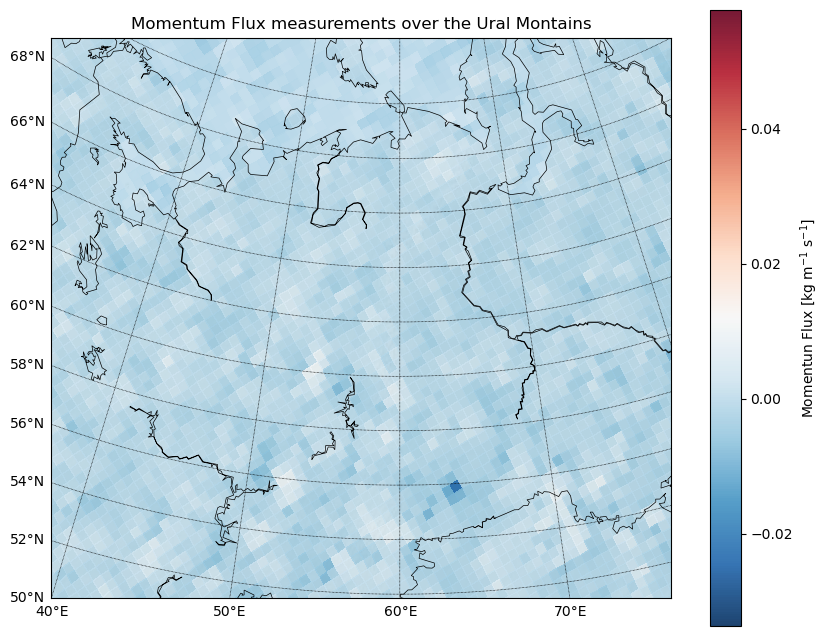

In [3]:
# Momentum Flux over Moountain Areas - Urals (use geo_plotting env)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/40_km_grid/30km/mfx/2003-01-17_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='stere', lon_0=60, lat_0=60, llcrnrlat=50, urcrnrlat=70,
            llcrnrlon=40, urcrnrlon=90, resolution='l')

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])

x, y = m(grid.nh_lon, grid.nh_lat)
m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9)
m.etopo(alpha=0.5)

m.shadedrelief(scale=0.5)

plt.colorbar(label='Momentun Flux [kg m$^{-1}$ s$^{-1}$]')
plt.title('Momentum Flux measurements over the Ural Montains')

plt.show()


<h1>Plot on colourmesh - Urals, mfx</h1>

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_28150/2751843606.py:60: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdYlBu_r', shading='auto', alpha=0.9, vmin=min_value, vmax=max_value)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

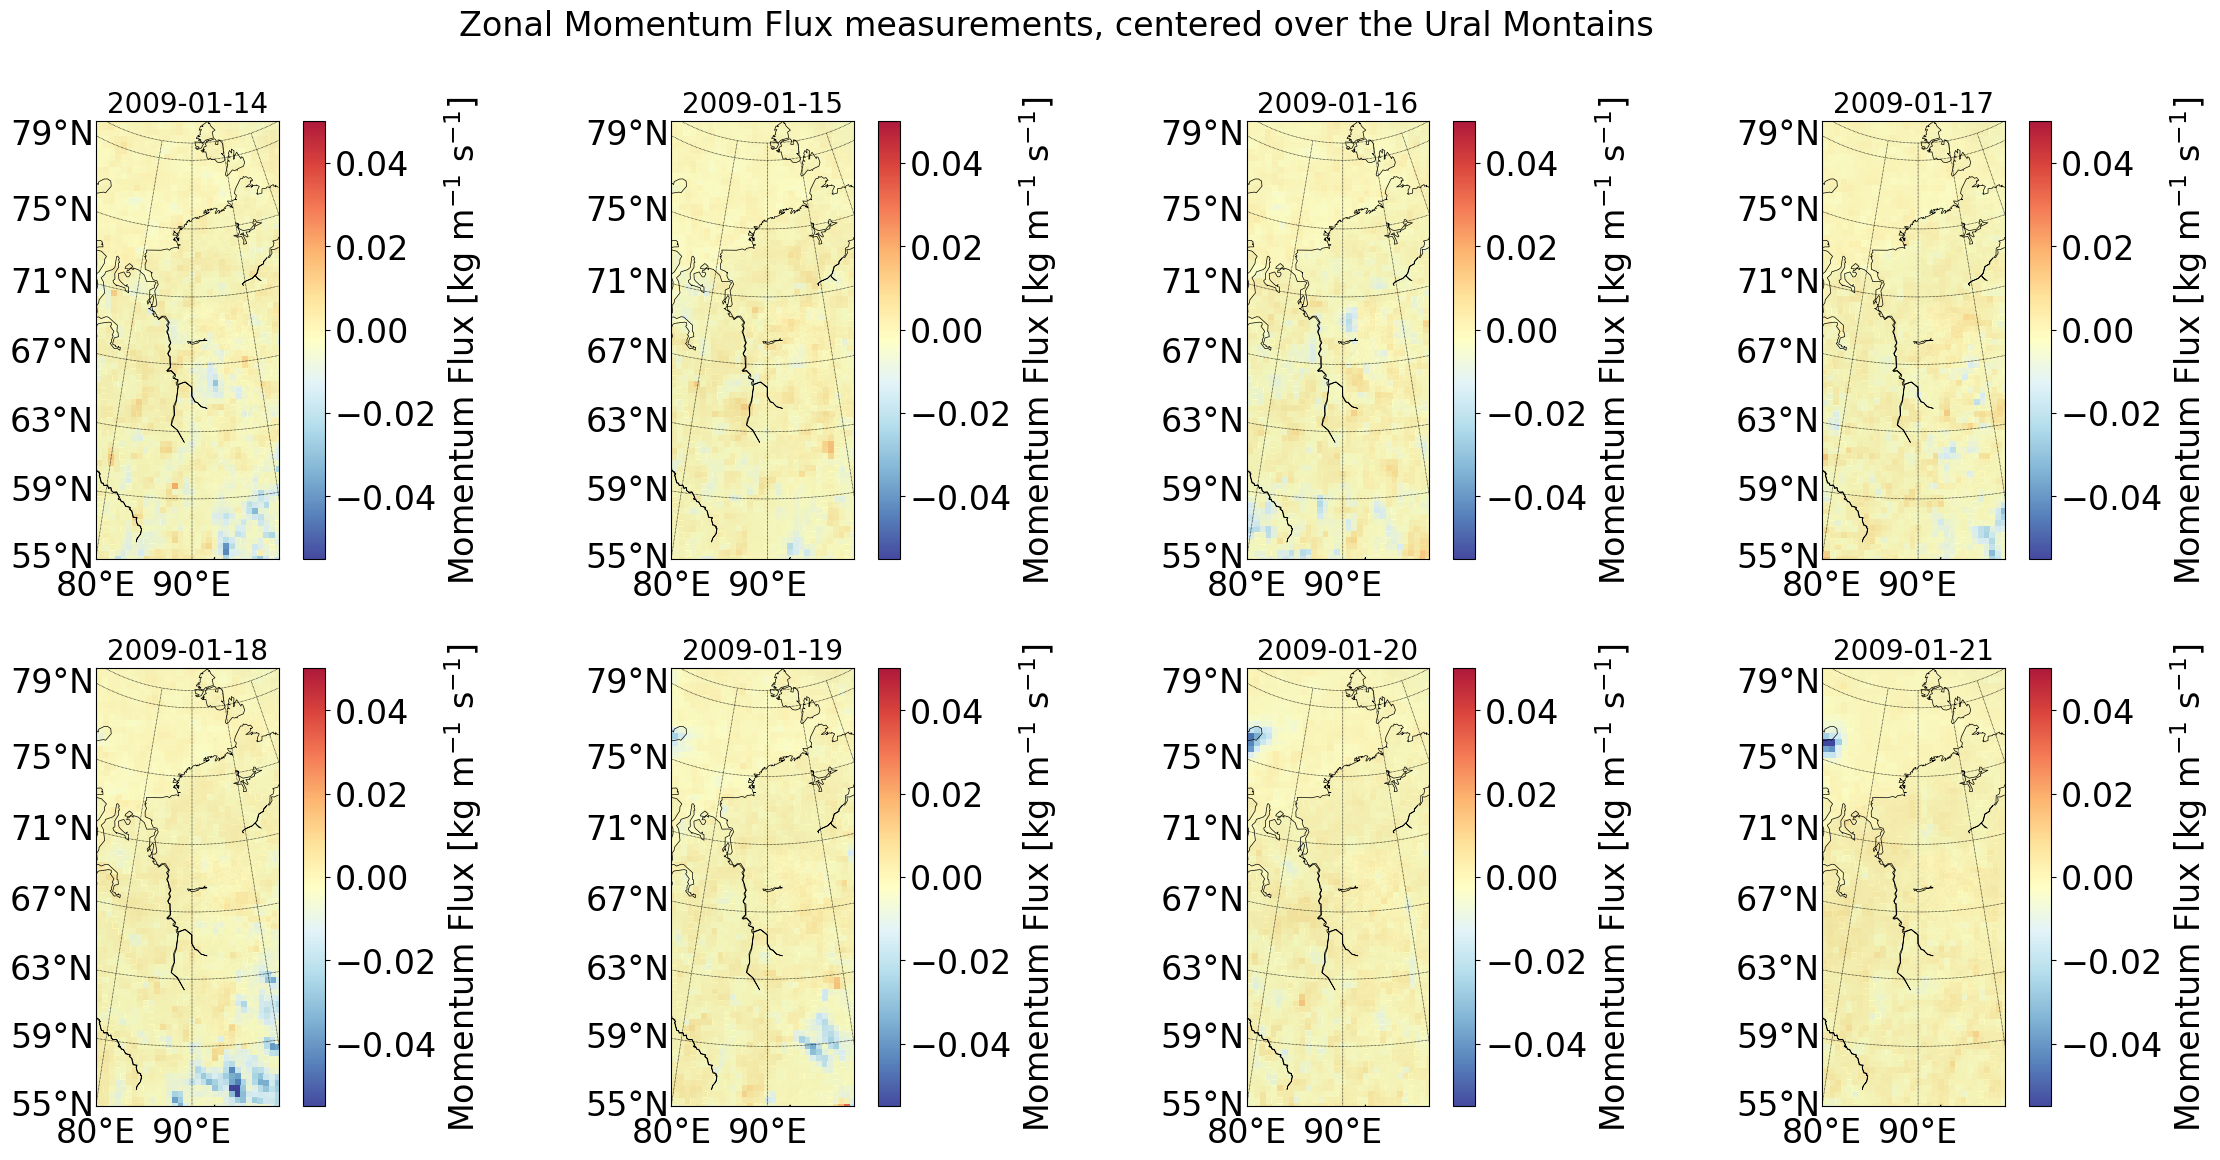

In [24]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects

data_type = 'mfx'
days = 8
dates = get_day_array(date_string="2009-01-22",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_climatological_mean = np.load(f'climatology/airs/30km/{data_type}/{dates[i][5:]}_daily_average.npz')['arr_0']
    perturbation = data - data_climatological_mean
    data_dict[f"data_{i+1}"] = data


# min_value = min([np.nanmin(data_dict[f'data_{i}']) for i in range(1, 9)])
# max_value = max([np.nanmax(data_dict[f'data_{i}']) for i in range(1, 9)])

min_value = 0.05
max_value = -0.05

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

lon_0 = 90
lat_0 = 60
llcrnrlat = 55
urcrnrlat = 80
llcrnrlon = 80
urcrnrlon = 120
# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': lon_0,
    'lat_0': lat_0,
    'llcrnrlat': llcrnrlat,
    'urcrnrlat': urcrnrlat,
    'llcrnrlon': llcrnrlon,
    'urcrnrlon': urcrnrlon,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(llcrnrlat, urcrnrlat, 4), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(llcrnrlon, urcrnrlon, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    im = m.pcolormesh(x, y, data_dict[f'data_{data_i}'], cmap='RdYlBu_r', shading='auto', alpha=0.9, vmin=min_value, vmax=max_value)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Momentum Flux [kg m$^{-1}$ s$^{-1}$]', location='right')
    # increase 
    ax.title.set_fontsize(20)

    data_i += 1


plt.suptitle('Zonal Momentum Flux measurements, centered over the Ural Montains', fontsize=24)
plt.tight_layout()
plt.show()

In [ ]:
# ============================= Plot on colourmesh - Urals, a ======================================


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data and create grid and wizard objects
data_type = 'tp'

days = 8
dates = get_day_array(date_string="2009-01-26",days=days)
data_dict = {}

for i in range(days):
    data = np.load(f'processed_airs_sftp/40_km_grid/30km/{data_type}/{dates[i]}_{data_type}.npz')['arr_0']
    data_dict[f"data_{i+1}"] = data
    

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(26, 12))

# Set common parameters for the map
map_params = {
    'projection': 'stere',
    'lon_0': 60,
    'lat_0': 60,
    'llcrnrlat': 50,
    'urcrnrlat': 70,
    'llcrnrlon': 40,
    'urcrnrlon': 90,
    'resolution': 'l'
}

# Loop over the subplots and plot the map
data_i = 1

for i, ax in enumerate(axes.flatten()):
    data = data_dict[f'data_{data_i}']

    m = Basemap(ax=ax, **map_params)
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawparallels(np.arange(50, 71, 2), linewidth=0.5, labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(40, 91, 10), linewidth=0.5, labels=[0, 0, 0, 1])
    x, y = m(grid.nh_lon, grid.nh_lat)
    im = m.pcolormesh(x, y, data, cmap='RdBu_r', shading='auto', alpha=0.9, vmin=-1.8, vmax=1.8)
    m.etopo(alpha=0.5)
    m.shadedrelief(scale=0.5)
    m.quiver(x, y, 
            data, data, scale = 10,latlon=True)

    ax.set_title(dates[data_i-1])
    # add colorbar with ranges from 
    fig.colorbar(im, ax=ax, label='Wave amplitude [km]', location='right')
    data_i += 1


plt.suptitle('Wave amplitude measurements over the Ural Montains', fontsize=24)
plt.tight_layout()
plt.show()

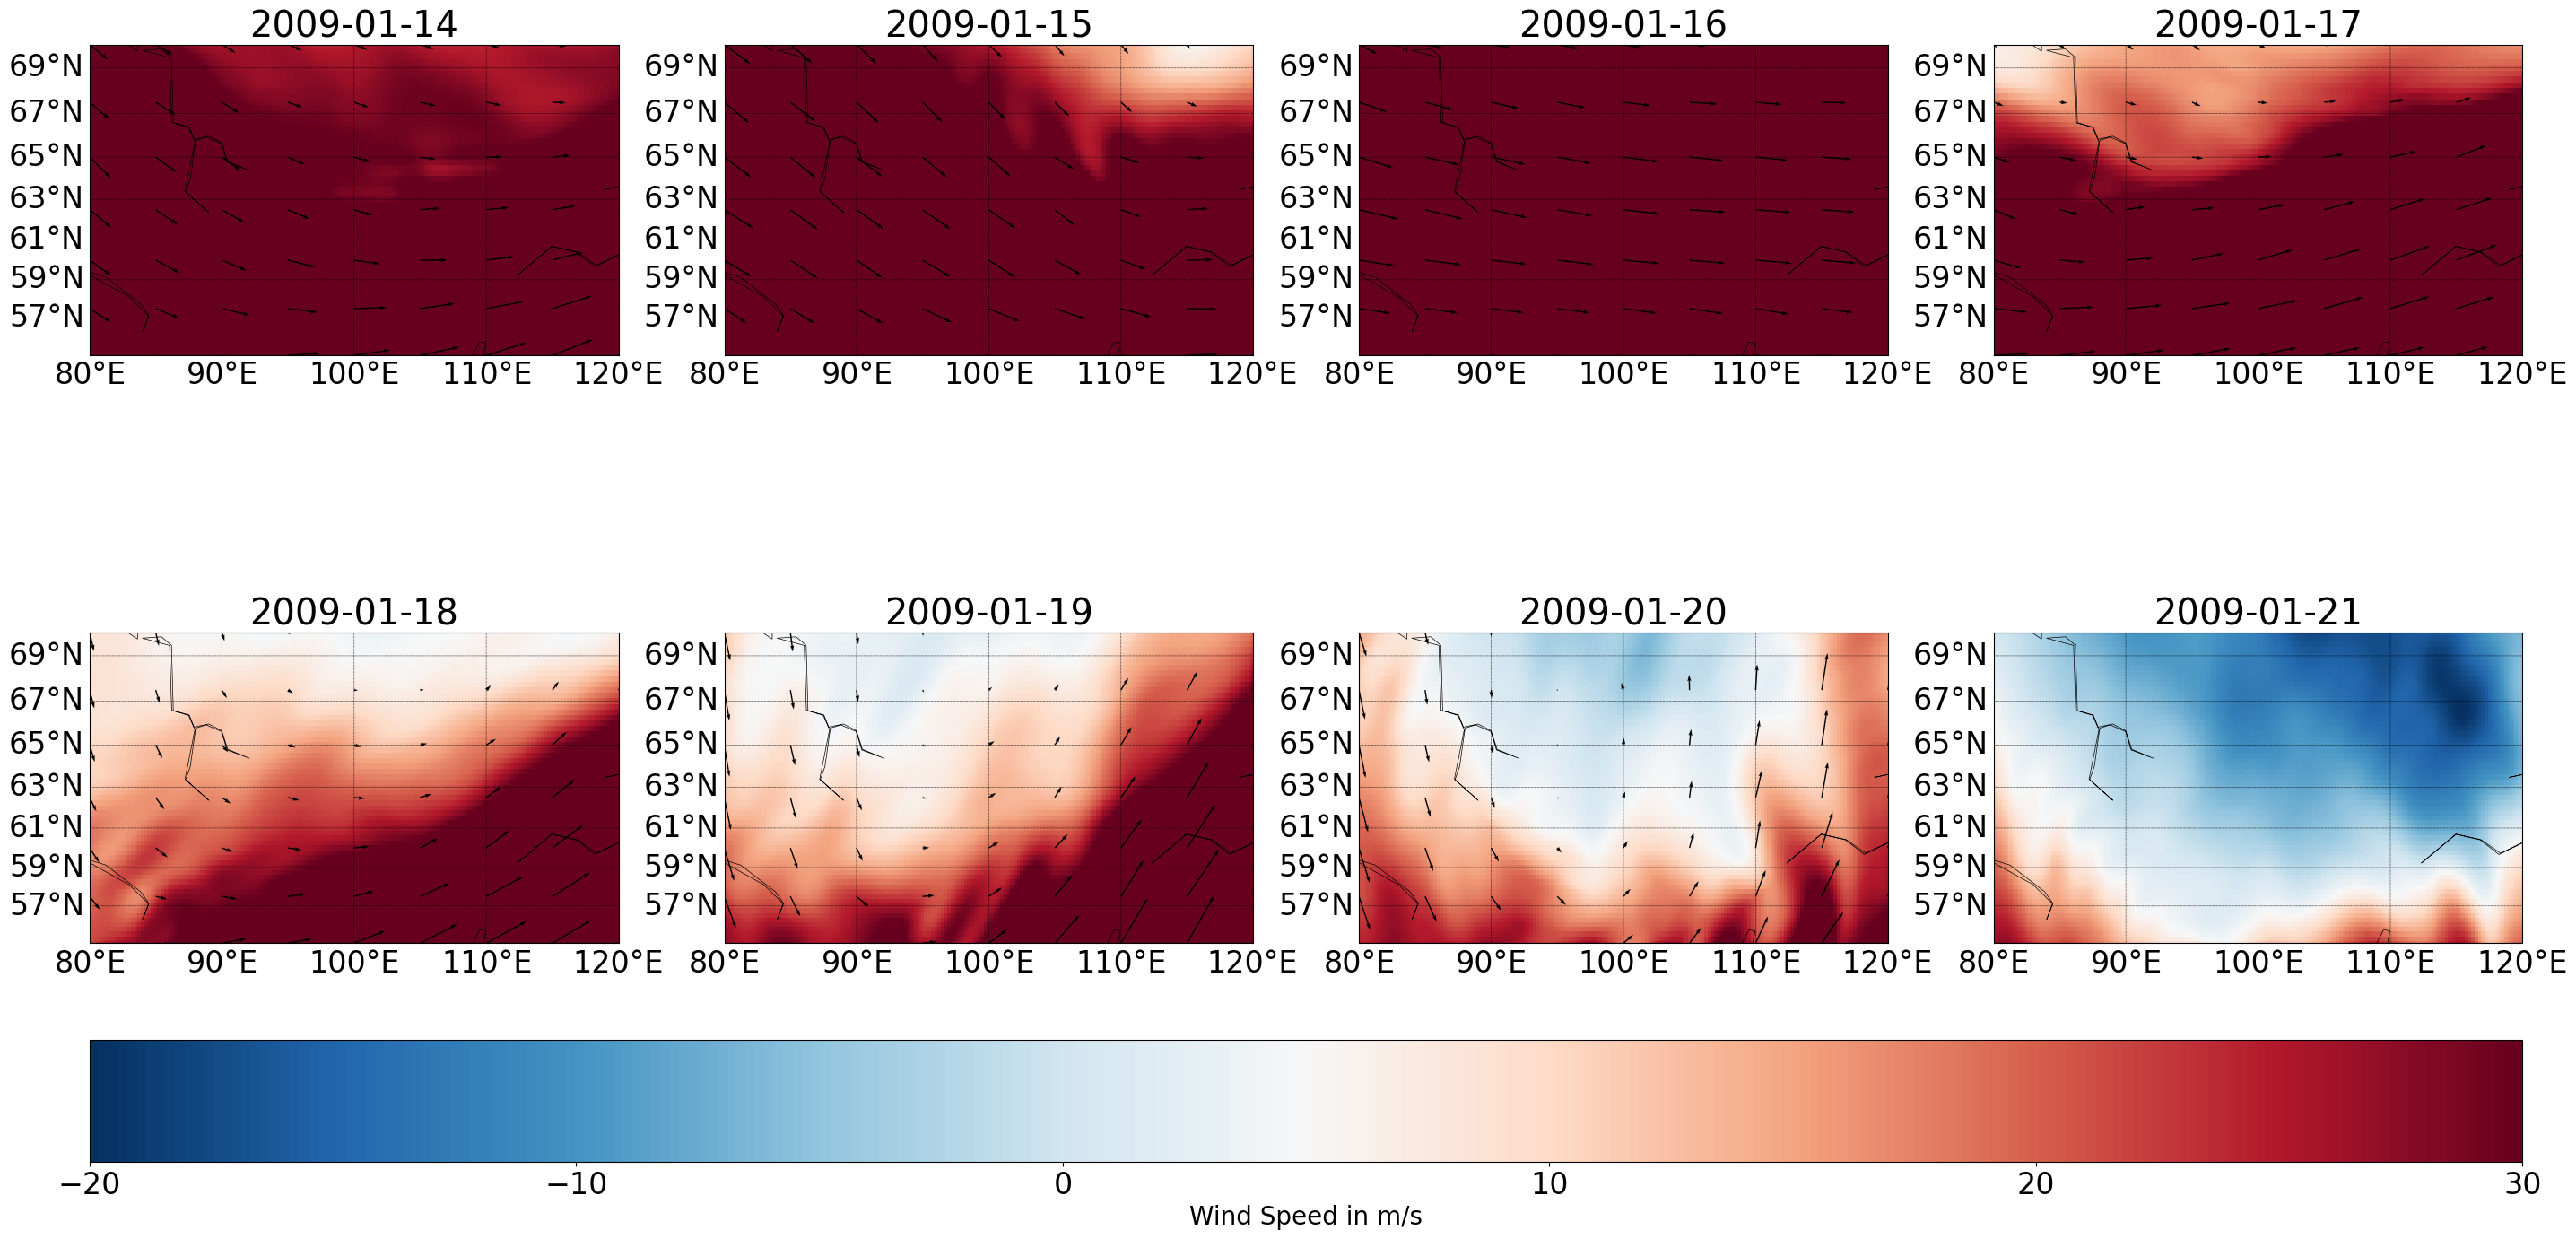

In [22]:
# =============================================
# plot a multiple days on a colour mesh and quiver
# =============================================
# load era5 data

grid = map_grid(grid_size=None, source = 'era5_online')
wizard = data_wizard()

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

days = 8
dates = get_day_array(date_string="2009-01-22",days=days)


data_dict = {}

for i in range(days):
    data_u = np.load(f'/Users/joaojesus/Desktop/final_year_proj/pre_processed_era5_online/COMPRESSED/WIND_EASTWARD/{dates[i]}.npz')['arr_0']
    data_v = np.load(f'/Users/joaojesus/Desktop/final_year_proj/pre_processed_era5_online/COMPRESSED/WIND_NORTHWARD/{dates[i]}.npz')['arr_0']
    data_dict[f"data_u_{i+1}"] = data_u
    data_dict[f"data_v_{i+1}"] = data_v


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(35, 20))
data_i = 1
vmin = -20
vmax = 30
for i in range(2):
    for j in range(4):
        data_u = data_dict[f'data_u_{data_i}']
        data_v = data_dict[f'data_v_{data_i}']
        ax = axes[i, j]

        llcrnrlat = 55
        urcrnrlat = 80
        llcrnrlon = 80
        urcrnrlon = 120
        m = Basemap(projection='mill',
                    llcrnrlat = llcrnrlat,
                    urcrnrlat = urcrnrlat,
                    llcrnrlon = llcrnrlon,
                    urcrnrlon = urcrnrlon,
                    ax=ax)

        m.shadedrelief(scale=0.5)

        m.pcolormesh(grid.grid_[0], 
                     grid.grid_[1], 
                     data_u,
                     vmin = vmin,
                     vmax = vmax,
                     latlon=True, cmap='RdBu_r',
                     shading='auto')

        x = grid.grid_[0][::10, ::20]
        y = grid.grid_[1][::10, ::20]

        data_u_d = data_u[::10, ::20]
        data_v_d = data_v[::10, ::20]

        m.quiver(x, y, 
             data_u_d, data_v_d,scale = 1000,latlon=True)

        m.drawcoastlines(linewidth=0.5,linestyle='solid')
        m.drawcountries(linewidth=0.5, linestyle='solid',color='k')
        m.drawparallels(np.arange(llcrnrlat, urcrnrlat+1, 2), linewidth=0.5, labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(llcrnrlon, urcrnrlon+1, 10), linewidth=0.5, labels=[0, 0, 0, 1])

        # Set the title of the subplot
        ax.set_title(dates[data_i-1])

        # increment the data_i
        data_i += 1

# Define the mappable object for the colorbar
mappable = m.pcolormesh(grid.grid_[0], 
                         grid.grid_[1], 
                         data_u,
                         vmin = vmin,
                         vmax = vmax,
                         latlon=True, cmap='RdBu_r',
                         shading='auto')

# Add the colorbar at the bottom of the figure and make label size 15

cbar = fig.colorbar(mappable, ax=axes, location='bottom', pad=0.07)

cbar.set_label('Wind Speed in m/s', fontsize=20)
# add a bit more padding between figures and their labels

plt.rcParams.update({'font.size': 24})
# increase size of colorbar text

plt.show()


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_10581/1234883550.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')


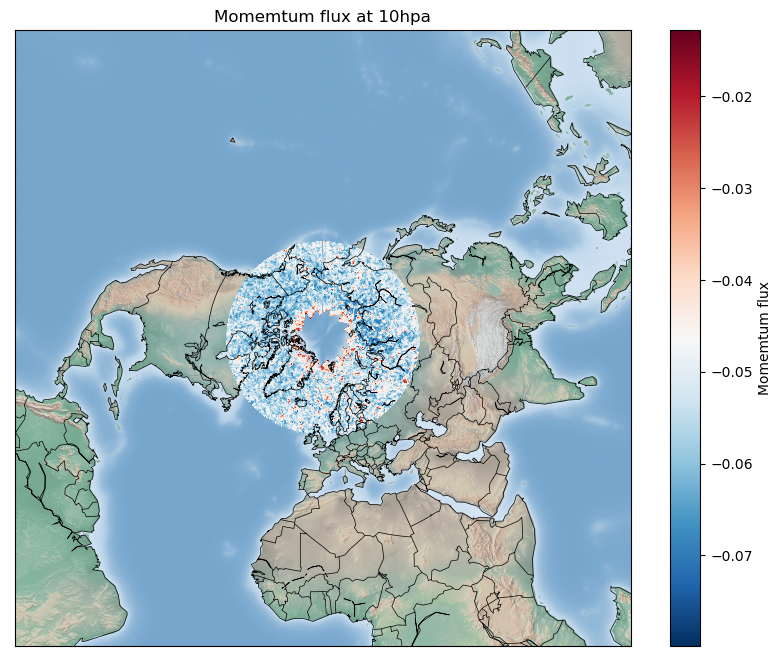

In [14]:
# =============================================================================
# Plot data for testing (40km grid)
# =============================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfx/2008-03-24_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Momemtum flux at 10hpa')
plt.colorbar(label='Momemtum flux')
